In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
fpath = "D:/tmp/AMP_TRANSACTION_201808.csv"

perf_data = pd.read_csv(fpath, header=0)


In [3]:
perf_data.size

3962403

In [4]:
perf_data.head()


,ID,TRANS_TIME,TOTAL_TIME,SERVER_TIME,STATUS_ID,SHORT_DESC,COMMAND_ID,NAME,REQUEST_TYPE
0,4222263934,8/27/2018 8:00:00. AM,658,13,1,STAT_OK,8259,utilities/Journal/view,1
1,4222263940,8/27/2018 8:00:00. AM,279,28,1,STAT_OK,7798,utilities/Authorization/myWorklist,1
2,4222263946,8/27/2018 8:00:00. AM,189,18,1,STAT_OK,10024,datacollection/grWorkRequirement/edit,1
3,4222265952,8/27/2018 8:00:00. AM,242,81,1,STAT_OK,8122,edbc/CalWorksEdbc/viewCalWorks,1
4,4222265953,8/27/2018 8:00:00. AM,219,21,1,STAT_OK,8258,utilities/Journal/search,1


In [5]:
perf_data['TRANS_TIME'].max()

'8/27/2018 8:59:59. AM'

In [6]:
print(perf_data.set_index('TRANS_TIME').resample('5T').mean().dropna().reset_index())

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

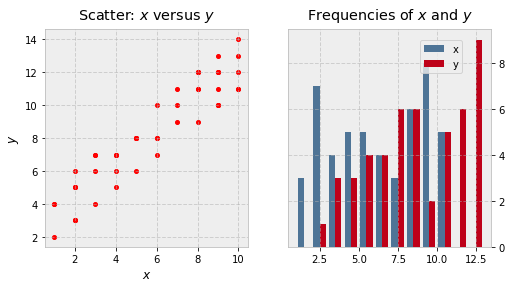

In [6]:
commands = perf_data["NAME"]
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
ax1.scatter(x = x, y = y, marker = 'o', c = 'r', edgecolor = 'r')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_title('Scatter: $x$ versus $y$')

ax2.hist(data, bins = np.arange(data.min(), data.max()), label = ('x', 'y'))
ax2.legend(loc = (0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

In [ ]:
fig, ax = plt.subplots()
ax.hist(perf_data["NAME"], bins="auto")
ax.set_title("Histogram of commands")

plt.show()


In [ ]:
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
ax1.scatter(x = x, y = y, marker = 'o', c = 'r', edgecolor = 'r')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_title('Scatter: $x$ versus $y$')

ax2.hist(data, bins = np.arange(data.min(), data.max()), label = ('x', 'y'))
ax2.legend(loc = (0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

### New cells to manipulate time series



In [ ]:
# Timeseries Dataframe to a Series with groupby
pan.groupby(pan.Time).mean()

# Option 1 with TimeGrouper
df.set_index('Time', inplace=True)
# Taking mean values for a frequency of 2 minutes
df_group = df.groupby(pd.TimeGrouper(level='Time', freq='2T'))['Value'].agg('mean')   
df_group.dropna(inplace=True)
df_group = df_group.to_frame().reset_index()
print(df_group)

# Option 2 with resample()
print(df.set_index('Time').resample('2T').mean().dropna().reset_index())